In [1]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv') 
df.drop(columns= ['customerID'], axis= 1, inplace= True)
df.sample(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1471,Male,0,Yes,No,31,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,No,Credit card (automatic),88.65,2683.2,No
2629,Male,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Credit card (automatic),70.70,140.7,Yes
4143,Male,0,No,No,25,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.80,2043.45,Yes
1578,Female,0,No,No,7,Yes,No,DSL,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,59.50,415.95,Yes
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
3400,Male,0,No,No,18,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),84.30,1537.9,No
1851,Female,0,Yes,No,2,No,No phone service,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,35.10,68.75,Yes
6315,Female,0,Yes,Yes,48,Yes,No,DSL,Yes,Yes,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),70.10,3238.4,No
6339,Male,0,No,Yes,1,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Mailed check,49.90,49.9,Yes
6111,Female,0,No,No,40,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,No,Bank transfer (automatic),83.85,3532.25,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.drop_duplicates(inplace= True)

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.shape

(7021, 20)

In [9]:
# First convert the column to numeric, handling errors
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Now replace NaN values (which would include the spaces that couldn't be converted) with the median
median_value = df['TotalCharges'].median()
df['TotalCharges'] = df['TotalCharges'].fillna(median_value)

In [10]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

In [11]:
num_cols = []
obj_cols = [] 
for col in df.columns:
    if df[col].dtype == 'object': 
        obj_cols.append(col)
    else: 
        num_cols.append(col)
print("Numeric Columns:", num_cols)
print("Object Columns:", obj_cols)

Numeric Columns: ['tenure', 'MonthlyCharges', 'TotalCharges']
Object Columns: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [12]:
cont_cols = num_cols
cat_cols = obj_cols

In [13]:
df['TotalCharges'].replace(0, df['TotalCharges'].median(), inplace= True)

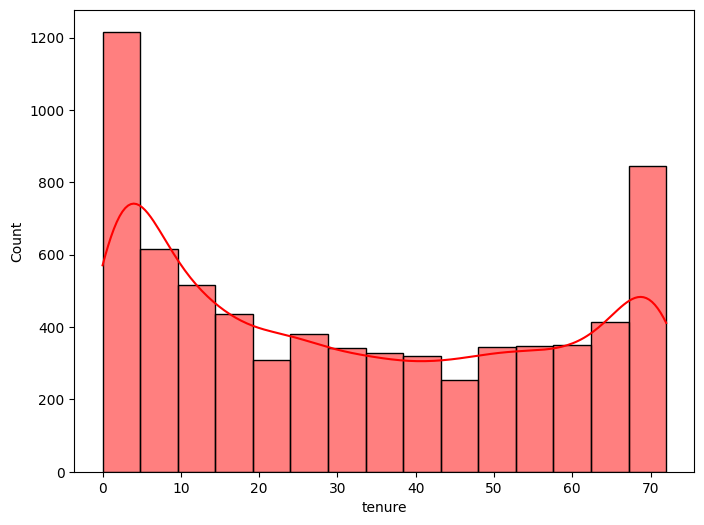

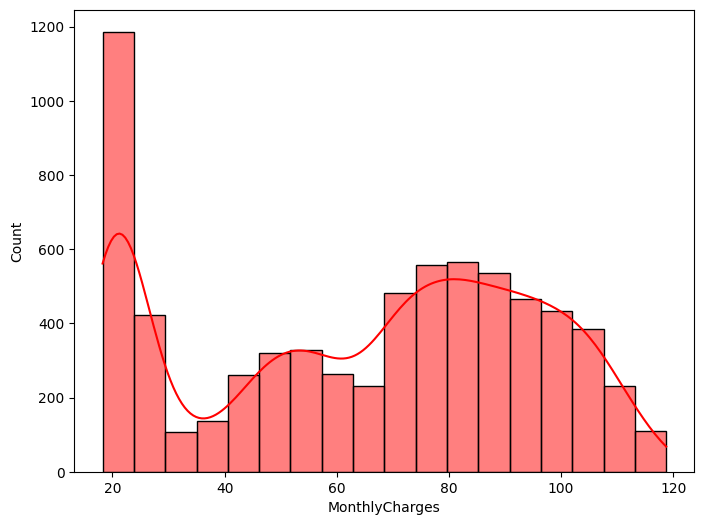

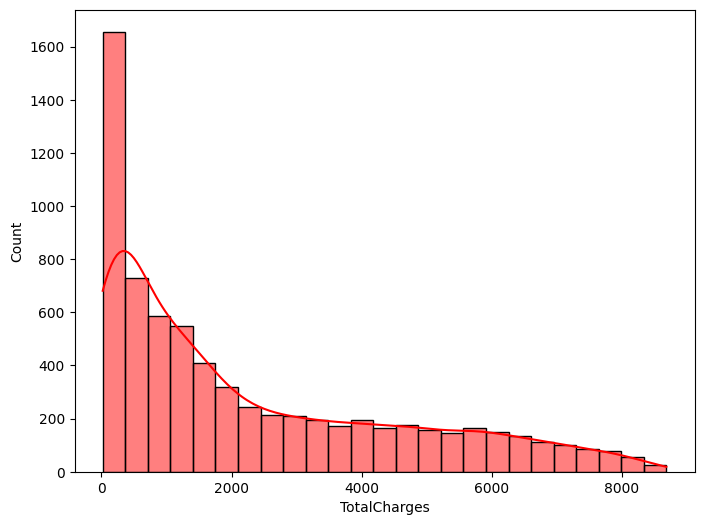

In [14]:
for col in cont_cols: 
    plt.figure(figsize= (8, 6)) 
    sns.histplot(df[col], color= 'Red', kde= True)
    plt.show()

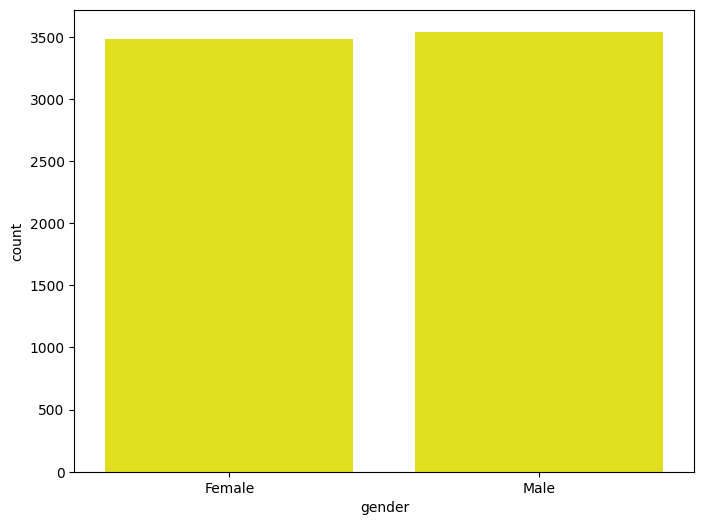

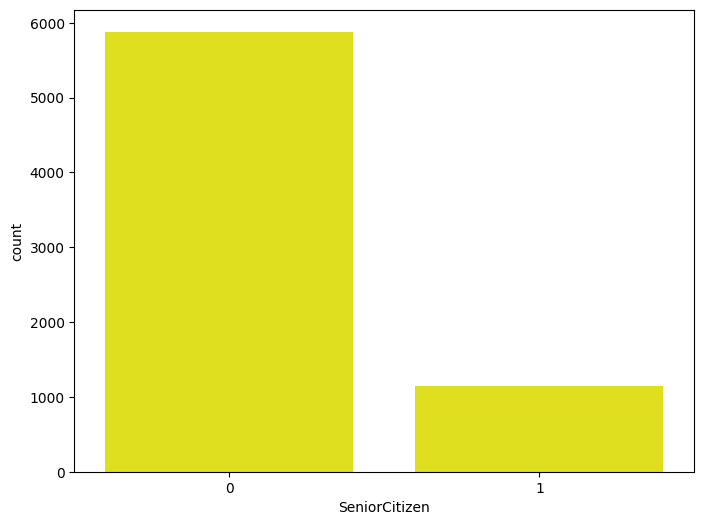

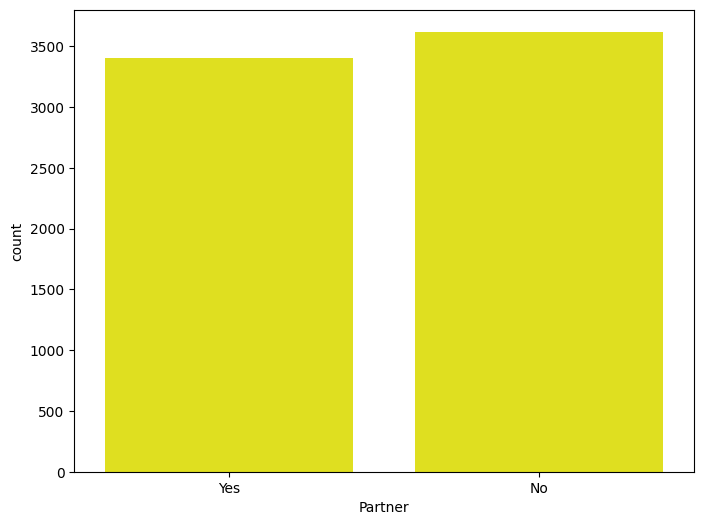

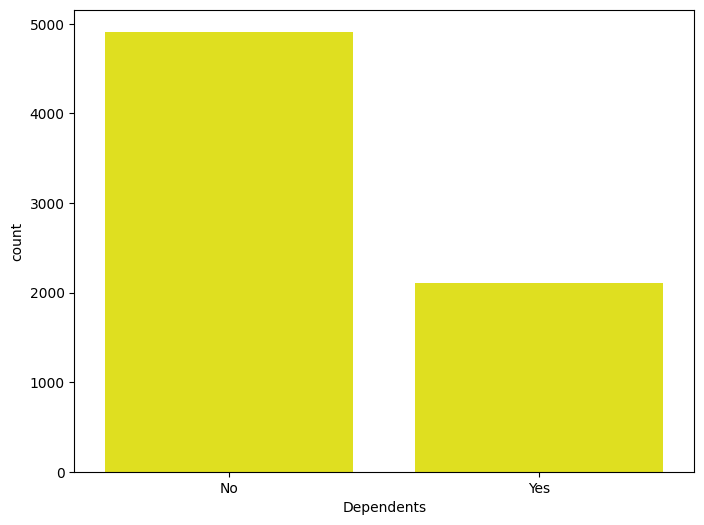

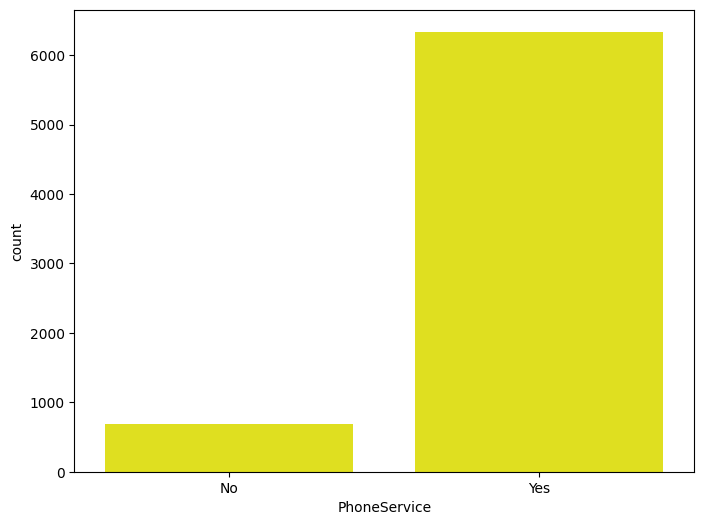

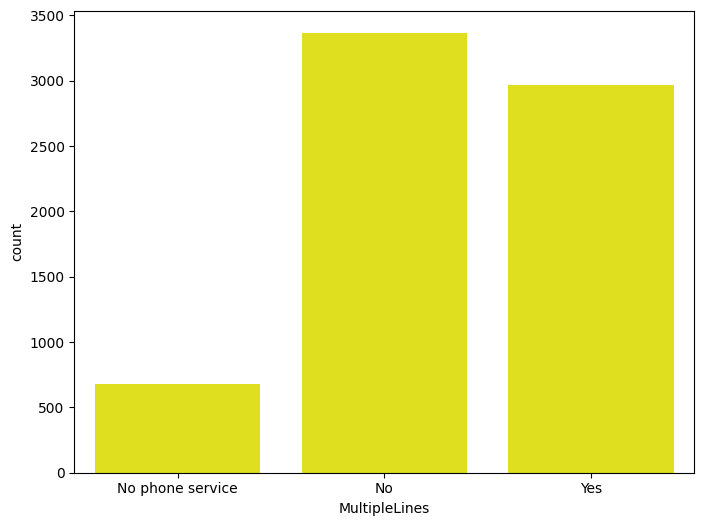

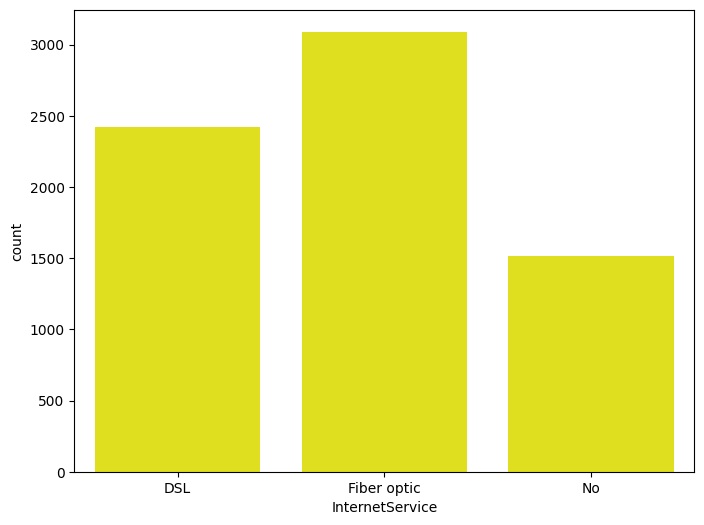

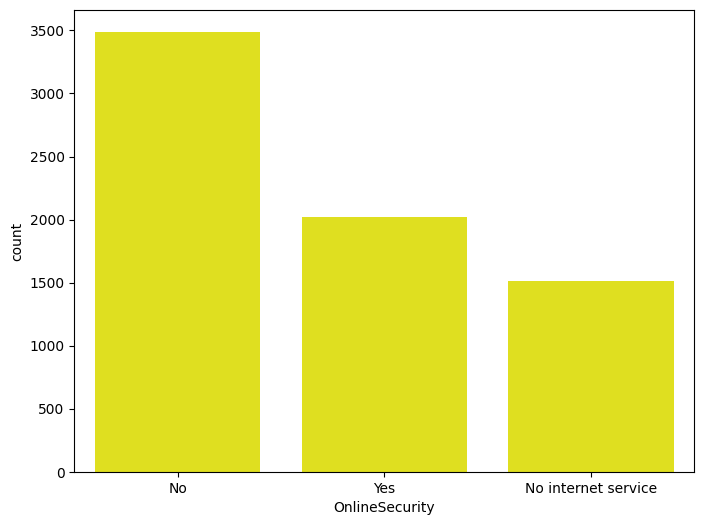

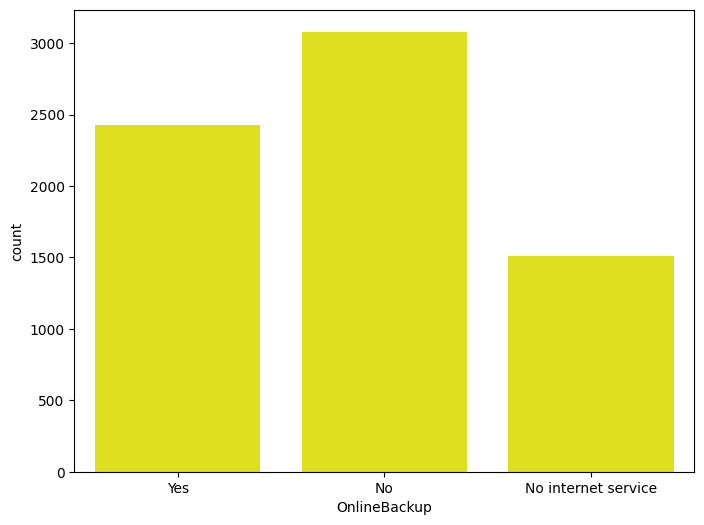

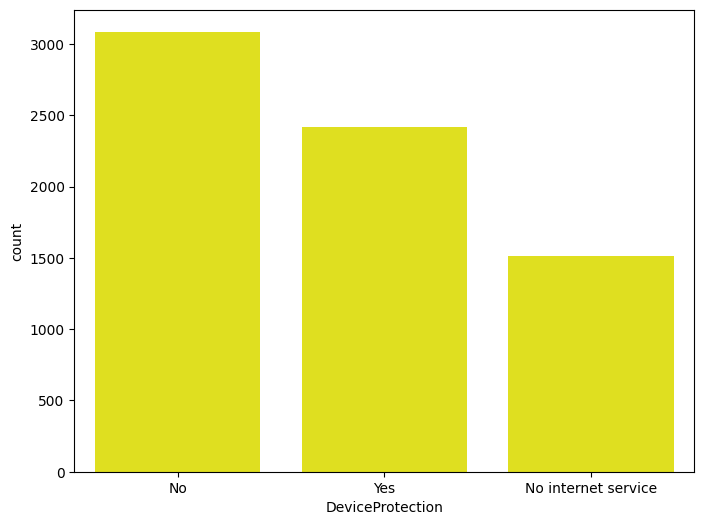

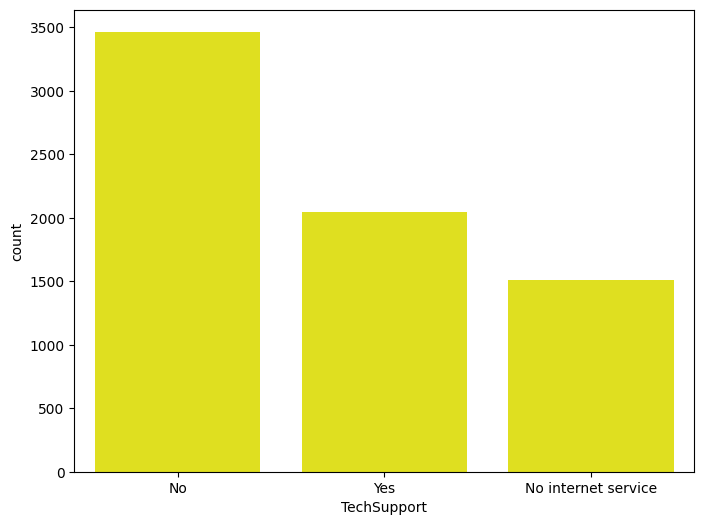

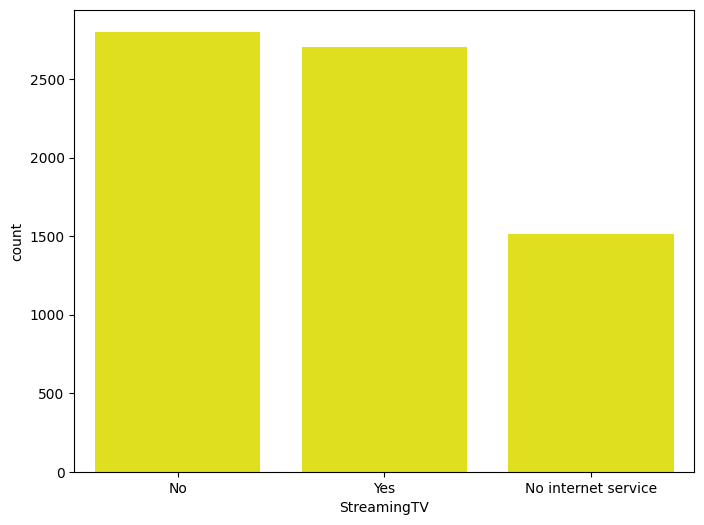

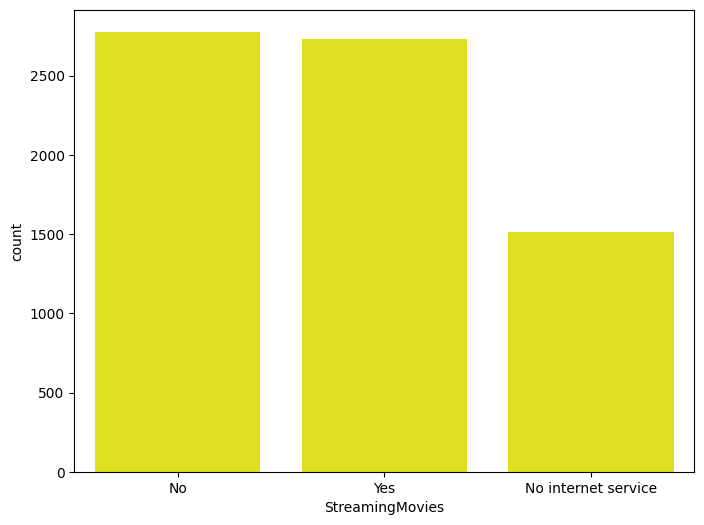

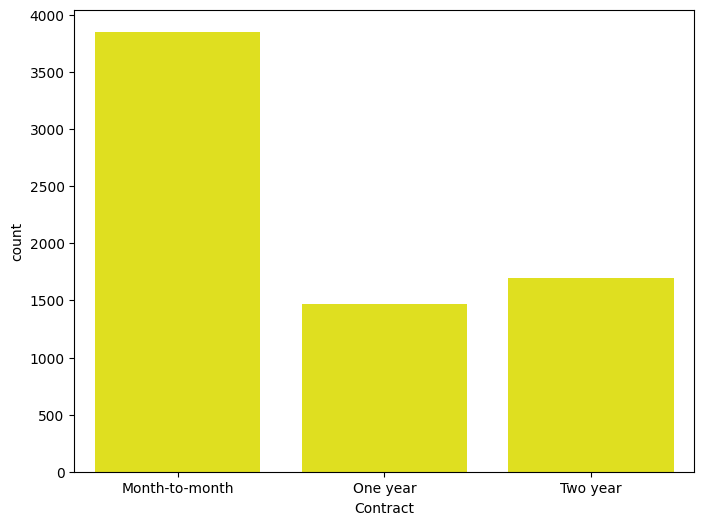

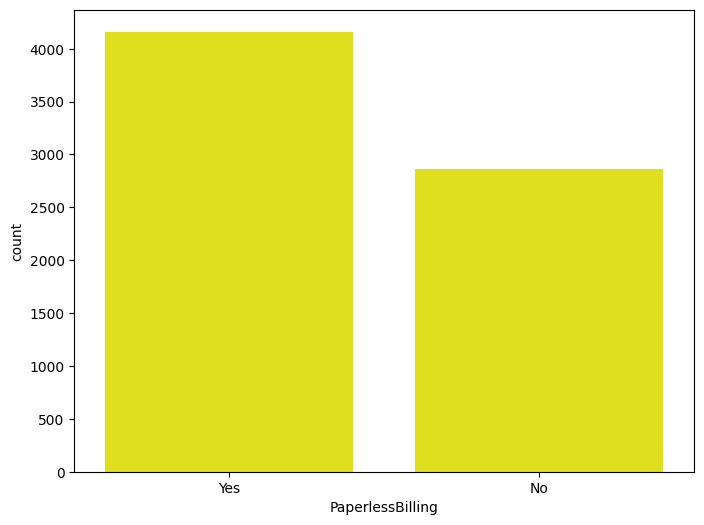

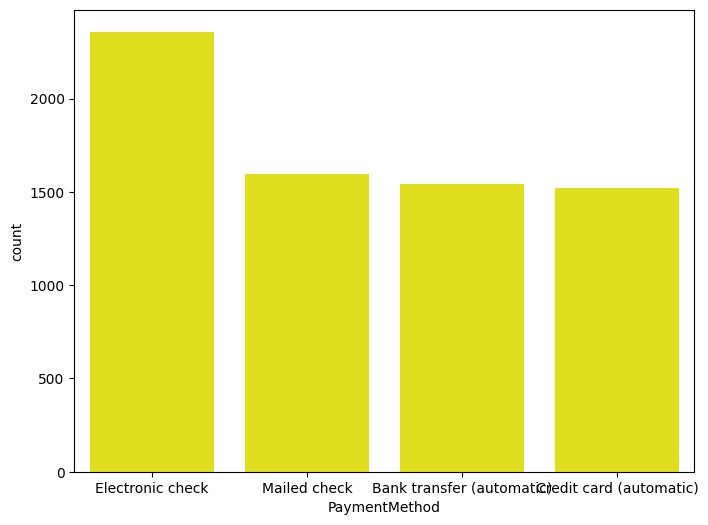

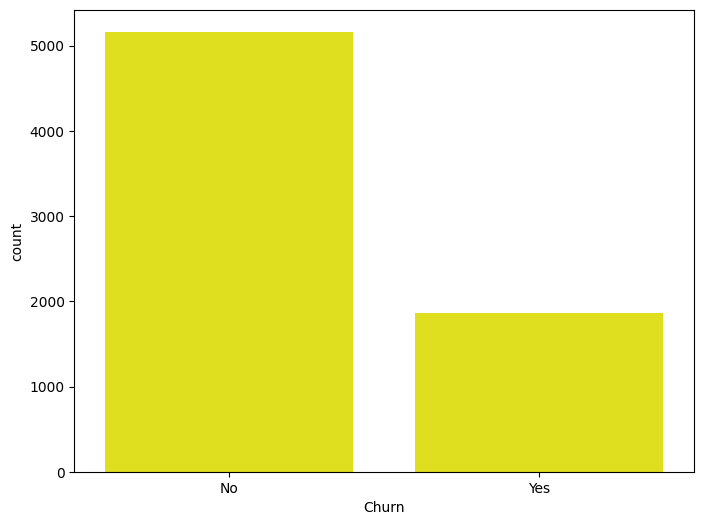

In [15]:
for col in cat_cols: 
    plt.figure(figsize= (8, 6)) 
    sns.countplot(x=df[col], color= 'Yellow')
    plt.show()

In [16]:
df = pd.get_dummies(df, columns= cat_cols, drop_first= True)
df.sample(10)

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
1979,45,20.00,886.40,False,False,True,True,True,False,False,...,False,True,False,False,True,True,False,False,False,False
5316,49,93.65,4520.15,True,False,True,True,True,False,True,...,True,False,False,True,False,True,False,True,False,False
6352,42,94.40,4014.60,True,False,True,False,True,False,True,...,False,False,True,False,False,True,False,True,False,False
3893,7,51.30,419.35,False,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False
3962,7,84.55,646.85,False,True,True,False,True,False,True,...,False,False,True,False,False,True,False,True,False,True
5870,5,25.90,135.00,True,False,True,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
5300,1,80.05,80.05,False,False,True,True,True,False,False,...,True,False,False,False,False,True,False,False,True,True
2452,15,74.20,1133.90,True,True,False,False,True,False,True,...,False,False,False,False,False,True,True,False,False,True
2560,46,93.70,4154.80,True,False,False,False,True,False,True,...,False,False,True,False,False,True,False,True,False,True
90,30,82.05,2570.20,True,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
df.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,1,29.85,29.85,False,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,34,56.95,1889.50,True,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,2,53.85,108.15,True,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,45,42.30,1840.75,True,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,2,70.70,151.65,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


In [18]:
for col in df.columns:
    if df[col].dtype == 'bool': 
        df[col] = df[col].astype('int')
    else: 
        continue
df.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,1,29.85,29.85,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,34,56.95,1889.50,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,2,53.85,108.15,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,45,42.30,1840.75,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


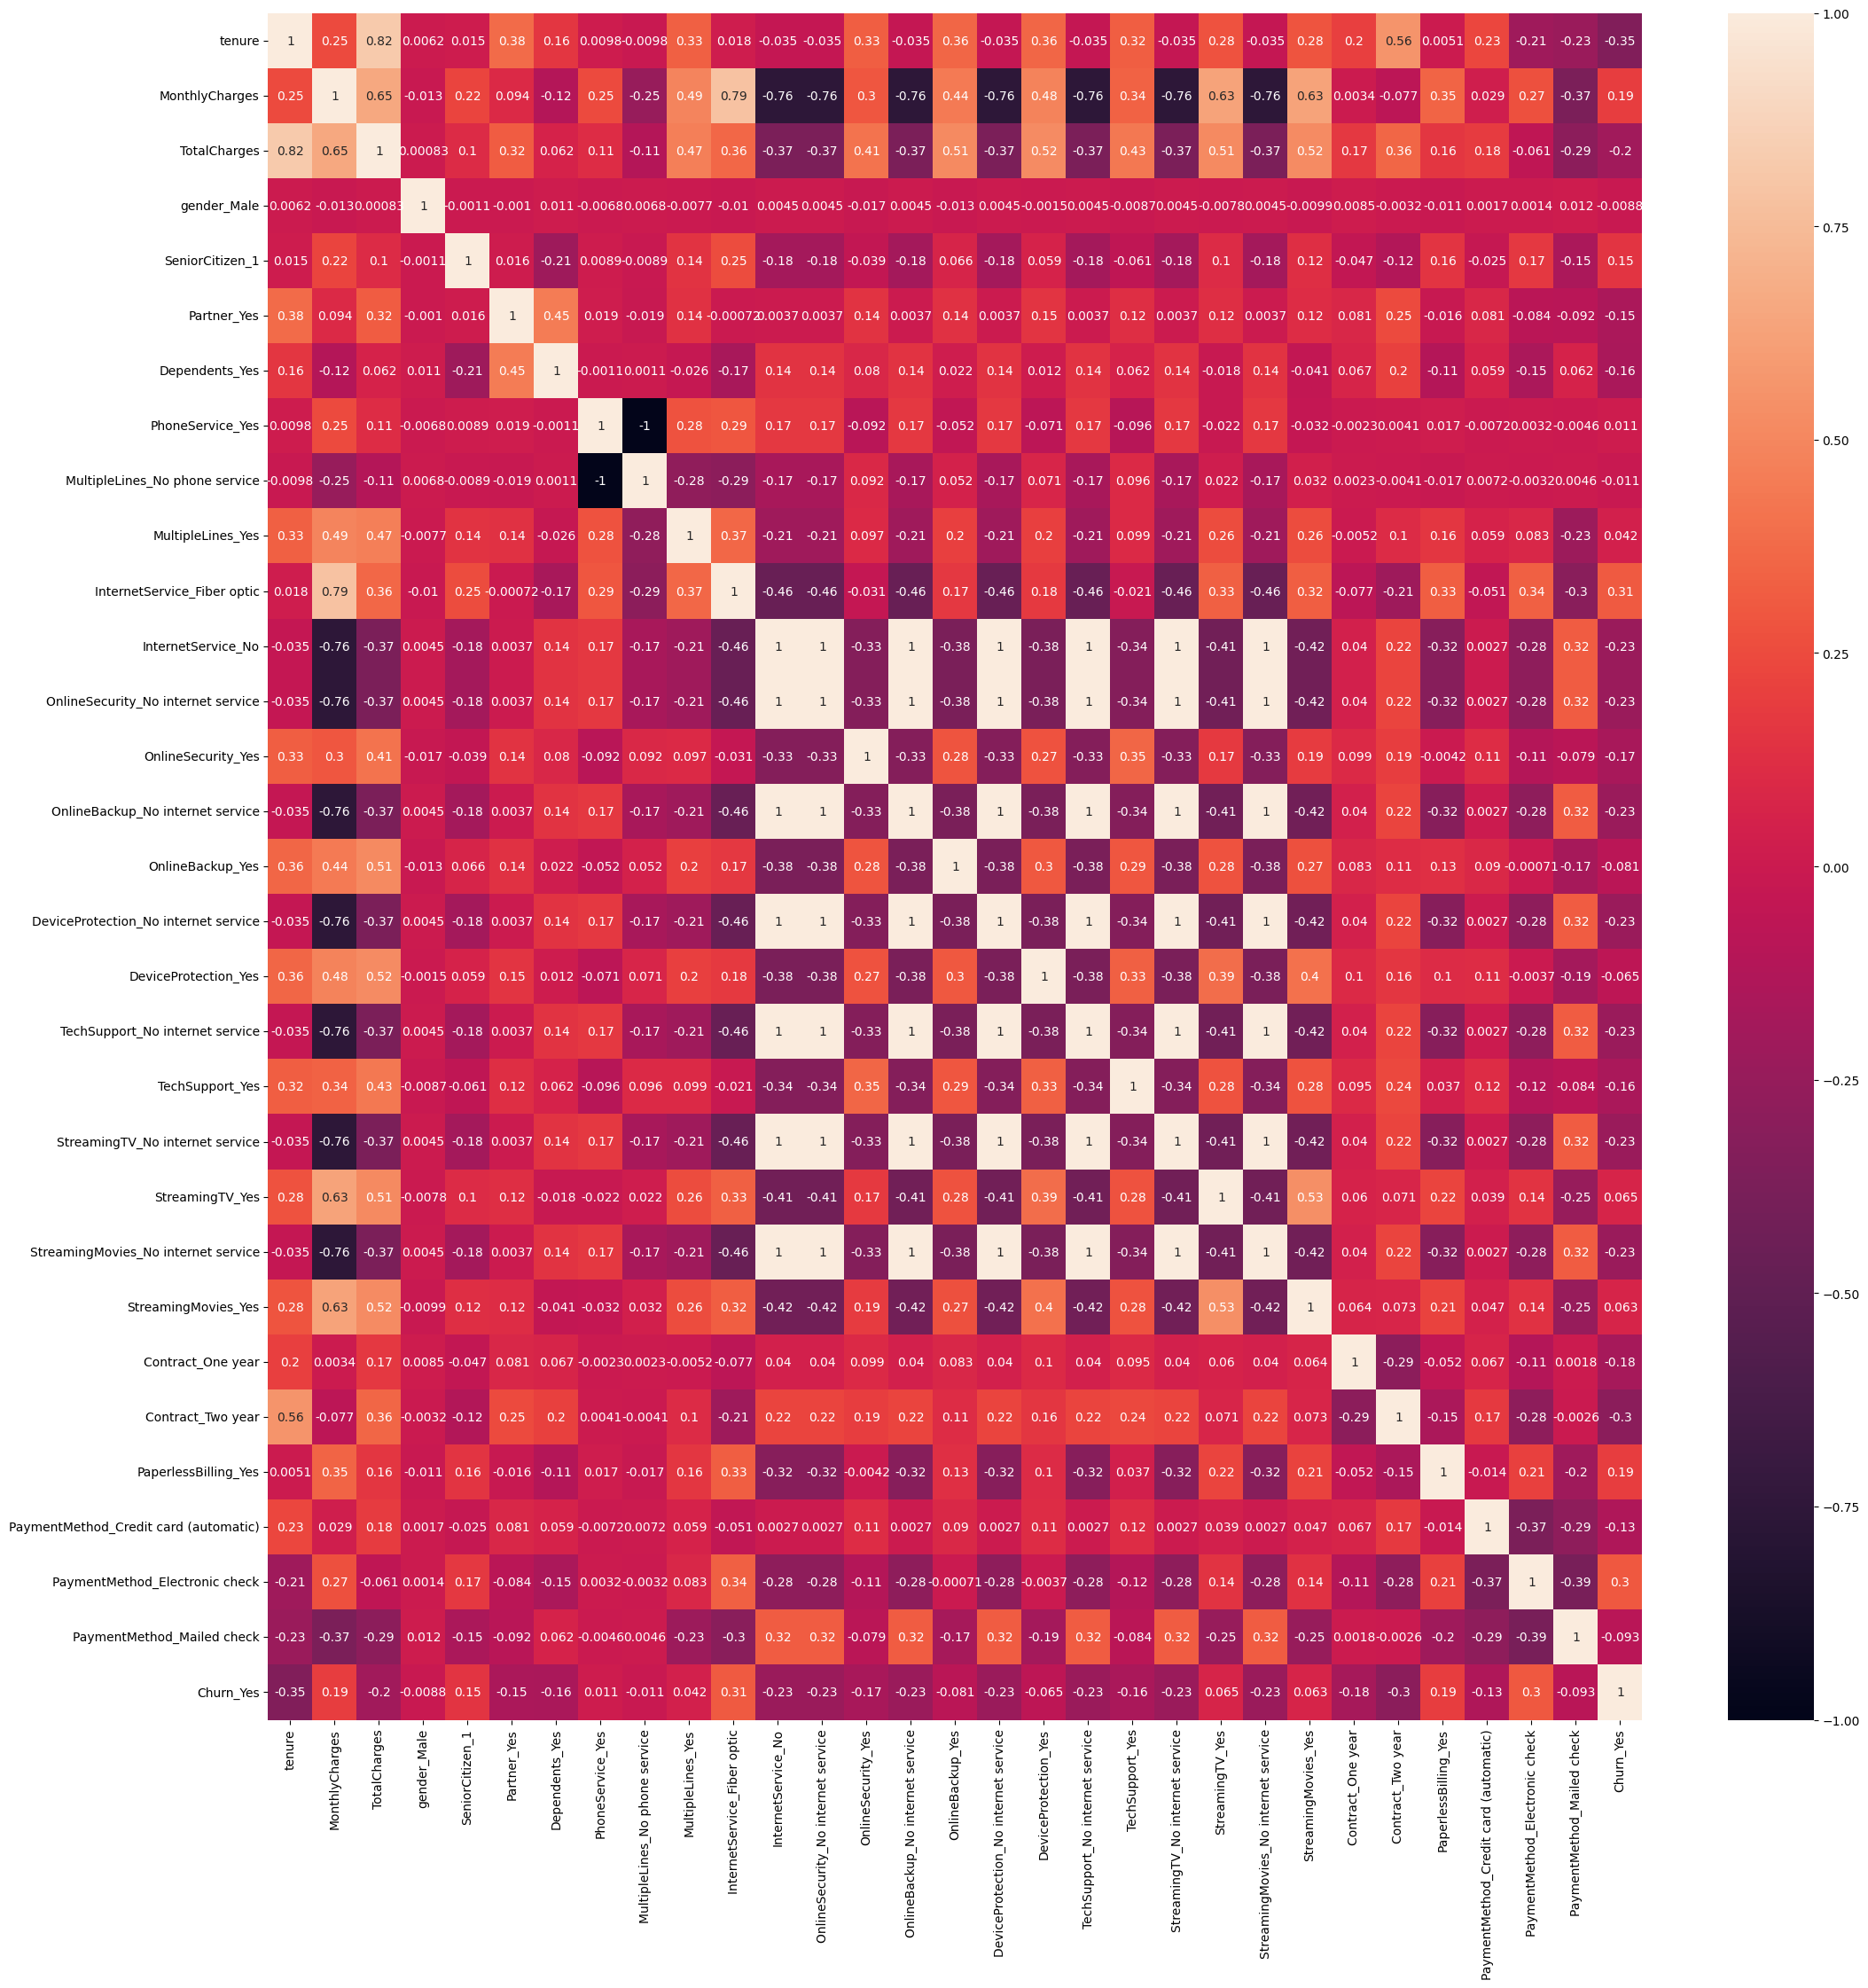

In [19]:
plt.figure(figsize= (25, 25))
sns.heatmap(df.corr(), annot= True)   
plt.show()

In [20]:
corr_with_churn = df.corrwith(df['Churn_Yes'])
print(corr_with_churn)

tenure                                  -0.351508
MonthlyCharges                           0.194508
TotalCharges                            -0.197914
gender_Male                             -0.008763
SeniorCitizen_1                          0.151619
Partner_Yes                             -0.149135
Dependents_Yes                          -0.163459
PhoneService_Yes                         0.011323
MultipleLines_No phone service          -0.011323
MultipleLines_Yes                        0.041958
InternetService_Fiber optic              0.308170
InternetService_No                      -0.228533
OnlineSecurity_No internet service      -0.228533
OnlineSecurity_Yes                      -0.170520
OnlineBackup_No internet service        -0.228533
OnlineBackup_Yes                        -0.081092
DeviceProtection_No internet service    -0.228533
DeviceProtection_Yes                    -0.064944
TechSupport_No internet service         -0.228533
TechSupport_Yes                         -0.163937


In [21]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])
df.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,-1.282728,-1.164135,-0.997334,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0.062387,-0.262811,-0.176352,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,-1.241967,-0.365914,-0.962766,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0.510759,-0.750058,-0.197874,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,-1.241967,0.194503,-0.943562,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


In [22]:
X = df.drop(columns= ['Churn_Yes'], axis= 1)
y = df['Churn_Yes']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.05, random_state= 42)

In [24]:
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    
    Dense(32, activation='relu'),
    Dropout(0.3),
    
    Dense(1, activation='sigmoid') 
])

model.compile(
    optimizer= 'adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tensorflow.keras.metrics.Precision(name='precision'),
        tensorflow.keras.metrics.Recall(name='recall')
    ]
)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=25,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.7599 - loss: 0.4924 - precision: 0.5858 - recall: 0.3101 - val_accuracy: 0.7946 - val_loss: 0.4370 - val_precision: 0.6642 - val_recall: 0.4959
Epoch 2/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7873 - loss: 0.4442 - precision: 0.6255 - recall: 0.4847 - val_accuracy: 0.7954 - val_loss: 0.4282 - val_precision: 0.6510 - val_recall: 0.5344
Epoch 3/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7949 - loss: 0.4293 - precision: 0.6408 - recall: 0.5089 - val_accuracy: 0.7909 - val_loss: 0.4235 - val_precision: 0.6296 - val_recall: 0.5620
Epoch 4/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7955 - loss: 0.4321 - precision: 0.6427 - recall: 0.5082 - val_accuracy: 0.8043 - val_loss: 0.4204 - val_precision: 0.6809 - val_recall: 0.5289
Epoch 5/100
  1/167 ━━━━━━━━━━━━━━━━━━━━ 1:09 419ms/step - accuracy: 0.7812 - loss: 0.3421 - precision: 1.0000 - recall: 0.2222

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred >= 0.5).astype(int)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))